# I23 3D PHANTOM GENERATOR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tomophantom import TomoP3D
from tomophantom.TomoP3D import Objects3D
from scipy.ndimage import gaussian_filter
from tomobar.methodsDIR import RecToolsDIR
from tomophantom.supp.artifacts import _Artifacts_
import random

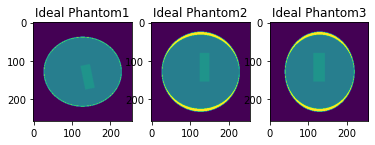

In [2]:
N_size = 256
# A PHANTOM WITHOUT ARTEFACTS
a_el1_min = 0.7
a_el1_max = 0.95
a_el1 = random.uniform(a_el1_min, a_el1_max)
b_el1_min = 0.6
b_el1_max = 0.75
b_el1 = random.uniform(b_el1_min, b_el1_max)
c_el1_min = 0.6
c_el1_max = 0.85
c_el1 = random.uniform(c_el1_min, c_el1_max)

el1 = {'Obj': Objects3D.ELLIPSOID,
      'C0' : 0.7,
      'x0' : 0.0,
      'y0' : 0.0,
      'z0' : 0.0,
      'a'  : a_el1,
      'b'  : b_el1,
      'c'  : c_el1,
      'phi1': 0.0}


a_el2_min = 0.6
a_el2_max = a_el1
a_el2 = random.uniform(a_el2_min, a_el2_max)
b_el2_min = 0.6
b_el2_max = b_el1
b_el2 = random.uniform(b_el2_min, b_el2_max)
c_el2_min = 0.6
c_el2_max = c_el1
c_el2 = random.uniform(c_el2_min, c_el2_max)

el2 = {'Obj': Objects3D.ELLIPSOID,
      'C0' : -0.4,
      'x0' : 0.0,
      'y0' : 0.0,
      'z0' : 0.0,
      'a'  : a_el2,
      'b'  : b_el2,
      'c'  : c_el2,
      'phi1' : 0.0}

C0_min = 0.01
C0_max = 0.2
C_0 = random.uniform(C0_min, C0_max)
a_el3_min = 0.1
a_el3_max = 0.7
a_el3 = random.uniform(a_el3_min, a_el3_max)
b_el3_min = 0.1
b_el3_max = 0.7
b_el3 = random.uniform(b_el3_min, b_el3_max)
c_el3_min = 0.1
c_el3_max = 0.7
c_el3 = random.uniform(c_el3_min, c_el3_max)
x0_rand = random.uniform(-0.15, 0.15)
y0_rand = random.uniform(-0.15, 0.15)
z0_rand = random.uniform(-0.15, 0.15)
phi_min = 0.0
phi_max = 180.0
phi1 = random.uniform(phi_min, phi_max)

el3 = {'Obj': Objects3D.CUBOID,
      'C0' : C_0,
      'x0' : x0_rand,
      'y0' : y0_rand,
      'z0' : z0_rand,
      'a'  : a_el3,
      'b'  :  b_el3,
      'c'  :  c_el3,
      'phi1': phi1}

GROUND_TRUTH = TomoP3D.Object(N_size, [el1,el2,el3])

GROUND_TRUTH[GROUND_TRUTH > 0.7] = 0.43336788
GROUND_TRUTH[(GROUND_TRUTH > 0.0) & (GROUND_TRUTH < 0.29999998)] = 0.43336788

sliceSel = (int)(N_size/2)
plt.figure() 
plt.subplot(131)
plt.imshow(GROUND_TRUTH[sliceSel,:,:])
plt.title('Ideal Phantom1')
plt.subplot(132)
plt.imshow(GROUND_TRUTH[:,sliceSel,:])
plt.title('Ideal Phantom2')
plt.subplot(133)
plt.imshow(GROUND_TRUTH[:,:,sliceSel])
plt.title('Ideal Phantom3')
plt.show()

Zingers have been added to the data.
Stripes have been simulated.
Gaussian noise have been added to the data.


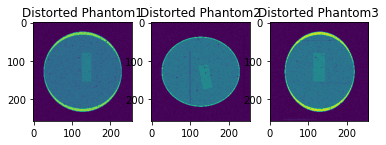

In [3]:
# forming dictionaries with artifact types
_noise_ =  {'noise_type' : 'Gaussian',
            'noise_amplitude' : 0.02, # noise amplitude
            'noise_seed' : None}

# adding zingers and stripes
_zingers_ = {'zingers_percentage' : 1.5,
             'zingers_modulus' : 50}

_stripes_ = {'stripes_percentage' : 1.2,
             'stripes_maxthickness' : 3.0,
             'stripes_intensity' : 0.25,
             'stripes_type' : 'partial',
             'stripes_variability' : 0.005}

Object = _Artifacts_(GROUND_TRUTH, **_noise_, **_zingers_, **_stripes_)



sliceSel = (int)(N_size/2)
plt.figure() 
plt.subplot(131)
plt.imshow(Object[:,sliceSel,:])
plt.title('Distorted Phantom1')
plt.subplot(132)
plt.imshow(Object[sliceSel,:,:])
plt.title('Distorted Phantom2')
plt.subplot(133)
plt.imshow(Object[:,:,sliceSel])
plt.title('Distorted Phantom3')
plt.show()

In [4]:
print ("Simulate synthetic flat fields, add flat field background to the projections and add noise")
from tomophantom.supp.flatsgen import synth_flats
from tomophantom.supp.artifacts import _Artifacts_

I0  = 75000; # Source intensity
flatsnum = 20 # the number of the flat fields required

angles_num = int(np.pi*N_size); # angles number
angles = np.linspace(0.0,179.9,angles_num,dtype='float32')
angles_rad = angles*(np.pi/180.0)
P = N_size #detectors

Rectools = RecToolsDIR(DetectorsDimH = P,           # Horizontal detector dimension
                    DetectorsDimV = N_size,           # Vertical detector dimension (3D case)
                    CenterRotOffset  = 0.0,         # Center of Rotation scalar
                    AnglesVec = angles_rad,          # A vector of projection angles in radians
                    ObjSize = N_size,                # Reconstructed object dimensions (scalar)
                    device_projector='gpu')

projection_data3D = Rectools.FORWPROJ(Object)
intens_max_clean = np.max(projection_data3D)

_fresnel_propagator_ = {'fresnel_dist_observation' : 40,
                        'fresnel_scale_factor' : 10,
                        'fresnel_wavelenght' : 0.007}
projection_data3D_fresnel = _Artifacts_(projection_data3D, **_fresnel_propagator_)

Simulate synthetic flat fields, add flat field background to the projections and add noise
Fresnel propagator have been simulated.


In [5]:
[projData3D_noisy, flatsSIM] = synth_flats(projection_data3D_fresnel,
                                           source_intensity = I0, source_variation=0.01,\
                                           arguments_Bessel = (1,10,10,12),\
                                           specklesize = 15,\
                                           kbar = 0.3,
                                           jitter = 0.1,
                                           sigmasmooth = 3, flatsnum=flatsnum)

Normalise projections using ToMoBAR software


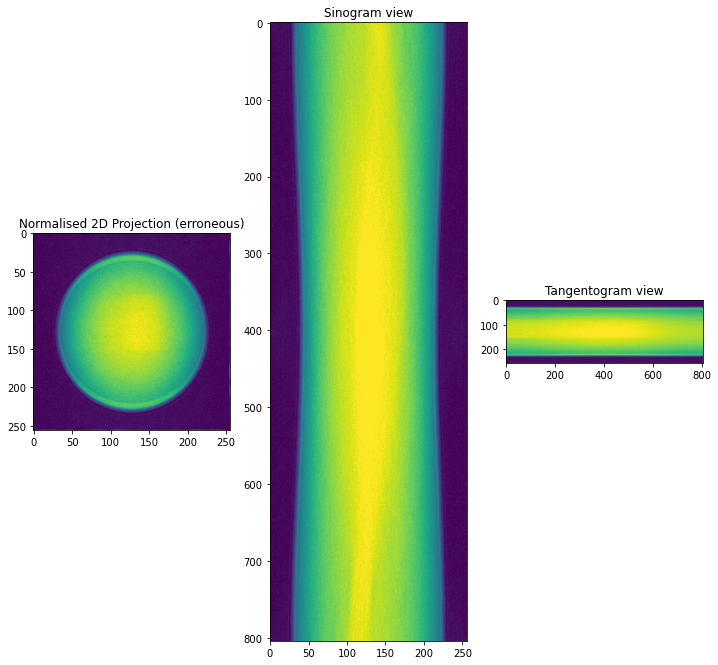

In [6]:
print ("Normalise projections using ToMoBAR software")
from tomobar.supp.suppTools import normaliser

# normalise the data, the required format is [detectorsX, Projections, detectorsY]
projData3D_norm = normaliser(projData3D_noisy, flatsSIM, darks=None, log='true', method='mean')

#del projData3D_noisy
intens_max = 0.3*np.max(projData3D_norm)
sliceSel = 150
plt.figure(figsize=(12,12)) 
plt.subplot(131)
plt.imshow(projData3D_norm[:,sliceSel,:],vmin=0, vmax=intens_max)
plt.title('Normalised 2D Projection (erroneous)')
plt.subplot(132)
plt.imshow(projData3D_norm[sliceSel,:,:],vmin=0, vmax=intens_max)
plt.title('Sinogram view')
plt.subplot(133)
plt.imshow(projData3D_norm[:,:,sliceSel],vmin=0, vmax=intens_max)
plt.title('Tangentogram view')
plt.show()

In [7]:
projData3D_norm.shape, N_size, P

((256, 804, 256), 256, 256)

Reconstruction using FBP from tomobar


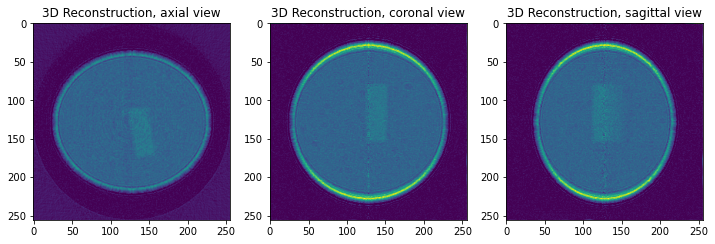

In [8]:
from tomobar.methodsDIR import RecToolsDIR
RectoolsDIR = RecToolsDIR(DetectorsDimH = P,  # DetectorsDimH # detector dimension (horizontal)
                    DetectorsDimV = N_size,  # DetectorsDimV # detector dimension (vertical) for 3D case only
                    CenterRotOffset = None, # Center of Rotation (CoR) scalar (for 3D case only)
                    AnglesVec = angles_rad, # array of angles in radians
                    ObjSize = N_size, # a scalar to define reconstructed object dimensions
                    device_projector = 'gpu')

print ("Reconstruction using FBP from tomobar")
recNumerical= RectoolsDIR.FBP(projData3D_norm) # FBP reconstruction
recNumerical *= intens_max_clean

sliceSel = int(0.5*N_size)
max_val = 1
#plt.gray()
plt.figure(figsize=(12,12)) 
plt.subplot(131)
plt.imshow(recNumerical[sliceSel,:,:],vmin=0, vmax=max_val)
plt.title('3D Reconstruction, axial view')

plt.subplot(132)
plt.imshow(recNumerical[:,sliceSel,:],vmin=0, vmax=max_val)
plt.title('3D Reconstruction, coronal view')

plt.subplot(133)
plt.imshow(recNumerical[:,:,sliceSel],vmin=0, vmax=max_val)
plt.title('3D Reconstruction, sagittal view')
plt.show()

## Phantom generator

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from tomophantom import TomoP3D
from tomophantom.TomoP3D import Objects3D
from scipy.ndimage import gaussian_filter
from tomobar.methodsDIR import RecToolsDIR
from tomophantom.supp.artifacts import _Artifacts_
from tomophantom.supp.flatsgen import synth_flats
import random
import time

num_phant = 10

gt_data = []
rec_data = []

for n in range(num_phant):
    
    tic = time.time()
    N_size = 256
    # A PHANTOM WITHOUT ARTEFACTS
    a_el1_min = 0.7
    a_el1_max = 0.95
    a_el1 = random.uniform(a_el1_min, a_el1_max)
    b_el1_min = 0.6
    b_el1_max = 0.75
    b_el1 = random.uniform(b_el1_min, b_el1_max)
    c_el1_min = 0.6
    c_el1_max = 0.85
    c_el1 = random.uniform(c_el1_min, c_el1_max)

    el1 = {'Obj': Objects3D.ELLIPSOID,
          'C0' : 0.7,
          'x0' : 0.0,
          'y0' : 0.0,
          'z0' : 0.0,
          'a'  : a_el1,
          'b'  : b_el1,
          'c'  : c_el1,
          'phi1': 0.0}


    a_el2_min = 0.6
    a_el2_max = a_el1
    a_el2 = random.uniform(a_el2_min, a_el2_max)
    b_el2_min = 0.6
    b_el2_max = b_el1
    b_el2 = random.uniform(b_el2_min, b_el2_max)
    c_el2_min = 0.6
    c_el2_max = c_el1
    c_el2 = random.uniform(c_el2_min, c_el2_max)

    el2 = {'Obj': Objects3D.ELLIPSOID,
          'C0' : -0.4,
          'x0' : 0.0,
          'y0' : 0.0,
          'z0' : 0.0,
          'a'  : a_el2,
          'b'  : b_el2,
          'c'  : c_el2,
          'phi1' : 0.0}

    C0_min = 0.01
    C0_max = 0.2
    C_0 = random.uniform(C0_min, C0_max)
    a_el3_min = 0.1
    a_el3_max = 0.7
    a_el3 = random.uniform(a_el3_min, a_el3_max)
    b_el3_min = 0.1
    b_el3_max = 0.7
    b_el3 = random.uniform(b_el3_min, b_el3_max)
    c_el3_min = 0.1
    c_el3_max = 0.7
    c_el3 = random.uniform(c_el3_min, c_el3_max)
    x0_rand = random.uniform(-0.15, 0.15)
    y0_rand = random.uniform(-0.15, 0.15)
    z0_rand = random.uniform(-0.15, 0.15)
    phi_min = 0.0
    phi_max = 180.0
    phi1 = random.uniform(phi_min, phi_max)

    el3 = {'Obj': Objects3D.CUBOID,
          'C0' : C_0,
          'x0' : x0_rand,
          'y0' : y0_rand,
          'z0' : z0_rand,
          'a'  : a_el3,
          'b'  :  b_el3,
          'c'  :  c_el3,
          'phi1': phi1}

    GROUND_TRUTH = TomoP3D.Object(N_size, [el1,el2,el3])
    """
    GROUND_TRUTH[GROUND_TRUTH > 0.7] = 0.43336788
    GROUND_TRUTH[(GROUND_TRUTH > 0.0) & (GROUND_TRUTH < 0.29999998)] = 0.43336788

    GROUND_TRUTH = TomoP3D.Object(N_size, [el1,el2,el3]) #!!!
    """
    val = np.unique(GROUND_TRUTH)
    if len(val) > 4:
        idx = np.where(val == 0.29999998)[0]
        GROUND_TRUTH[GROUND_TRUTH > 0.7] = val[idx+1]
        GROUND_TRUTH[(GROUND_TRUTH > 0.0) & (GROUND_TRUTH < val[idx])] = val[idx+1]
        val = np.unique(GROUND_TRUTH)
    gt_values = [0,1,2,3]
    real_gt = []
    tmp = np.zeros(GROUND_TRUTH.shape)
    for n in range(len(val)):
        tmp[GROUND_TRUTH == val[n]] = gt_values[n]
    gt_data.append(torch.tensor(tmp))
    
    print("Generating artificial phantom")
    # forming dictionaries with artifact types
    _noise_ =  {'noise_type' : 'Gaussian',
                'noise_amplitude' : 0.02, # noise amplitude
                'noise_seed' : None}

    # adding zingers and stripes
    _zingers_ = {'zingers_percentage' : 1.5,
                 'zingers_modulus' : 50}

    _stripes_ = {'stripes_percentage' : 1.2,
                 'stripes_maxthickness' : 3.0,
                 'stripes_intensity' : 0.25,
                 'stripes_type' : 'partial',
                 'stripes_variability' : 0.005}

    Object = _Artifacts_(GROUND_TRUTH, **_noise_, **_zingers_, **_stripes_)
    
    print ("Simulate synthetic flat fields, add flat field background to the projections and add noise")
    I0  = 75000; # Source intensity
    flatsnum = 20 # the number of the flat fields required

    angles_num = int(np.pi*N_size); # angles number
    angles = np.linspace(0.0,179.9,angles_num,dtype='float32')
    angles_rad = angles*(np.pi/180.0)
    P = N_size #detectors

    Rectools = RecToolsDIR(DetectorsDimH = P,           # Horizontal detector dimension
                        DetectorsDimV = N_size,           # Vertical detector dimension (3D case)
                        CenterRotOffset  = 0.0,         # Center of Rotation scalar
                        AnglesVec = angles_rad,          # A vector of projection angles in radians
                        ObjSize = N_size,                # Reconstructed object dimensions (scalar)
                        device_projector='gpu')

    projection_data3D = Rectools.FORWPROJ(Object)
    intens_max_clean = np.max(projection_data3D)

    _fresnel_propagator_ = {'fresnel_dist_observation' : 40,
                            'fresnel_scale_factor' : 10,
                            'fresnel_wavelenght' : 0.007}
    projection_data3D_fresnel = _Artifacts_(projection_data3D, **_fresnel_propagator_)
    
    [projData3D_noisy, flatsSIM] = synth_flats(projection_data3D_fresnel,
                                           source_intensity = I0, source_variation=0.01,\
                                           arguments_Bessel = (1,10,10,12),\
                                           specklesize = 15,\
                                           kbar = 0.3,
                                           jitter = 0.1,
                                           sigmasmooth = 3, flatsnum=flatsnum)
    
    print ("Normalise projections using ToMoBAR software")
    # normalise the data, the required format is [detectorsX, Projections, detectorsY]
    projData3D_norm = normaliser(projData3D_noisy, flatsSIM, darks=None, log='true', method='mean')
    
    RectoolsDIR = RecToolsDIR(DetectorsDimH = P,  # DetectorsDimH # detector dimension (horizontal)
                        DetectorsDimV = N_size,  # DetectorsDimV # detector dimension (vertical) for 3D case only
                        CenterRotOffset = None, # Center of Rotation (CoR) scalar (for 3D case only)
                        AnglesVec = angles_rad, # array of angles in radians
                        ObjSize = N_size, # a scalar to define reconstructed object dimensions
                        device_projector = 'gpu')

    print ("Reconstruction using FBP from tomobar")
    recNumerical= RectoolsDIR.FBP(projData3D_norm) # FBP reconstruction
    recNumerical *= intens_max_clean
    rec_data.append(torch.tensor(recNumerical))
    toc = time.time() - tic
    
    print("Time:", toc)
    
rec_data = torch.stack(rec_data).squeeze()
gt_data = torch.stack(gt_data).squeeze()

Generating artificial phantom
Zingers have been added to the data.
Stripes have been simulated.
Gaussian noise have been added to the data.
Simulate synthetic flat fields, add flat field background to the projections and add noise
Fresnel propagator have been simulated.
Normalise projections using ToMoBAR software
Reconstruction using FBP from tomobar
Time: 27.021267652511597
Generating artificial phantom
Zingers have been added to the data.
Stripes have been simulated.
Gaussian noise have been added to the data.
Simulate synthetic flat fields, add flat field background to the projections and add noise
Fresnel propagator have been simulated.
Normalise projections using ToMoBAR software
Reconstruction using FBP from tomobar
Time: 26.855093240737915
Generating artificial phantom
Zingers have been added to the data.
Stripes have been simulated.
Gaussian noise have been added to the data.
Simulate synthetic flat fields, add flat field background to the projections and add noise
Fresnel pro

In [14]:
# Save data
import h5py

PATH = "./data/"

h5f = h5py.File(PATH + 'train_data.h5', 'w')
h5f.create_dataset('rec_data', data=rec_data)
h5f.create_dataset('gt_data', data=gt_data)
h5f.close()

In [56]:
PATH = "./data/"

h5f = h5py.File(PATH + 'train_data.h5', 'r')
rec_data = np.array(h5f["rec_data"])
gt_data = np.array(h5f["gt_data"])